# Part II - Ford GoBike System Data
## by Njeri Macharia

## Investigation Overview


> The main purpose of this analysis is to invetigates users of the service and how time (duration of bike rides) interacts with user characteristics.


## Dataset Overview

> This project explores and analyses a dataset containing the Ford GoBike System Data. Ford GoBike is a regional public bike sharing system in the San Francisco Bay Area, California. This dataset includes information about individual rides made on bike-sharing system. Ford GoBike, now known as Bay Wheels, was established in 2013 as Bay Area Bike Share and re-launched in 2017 as Ford GoBike. As of January 2018, the Bay Wheels system had about 10,000 annual subscribers, over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. The dataset used for this analysis consists of trip data from 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike_trips_clean.csv')
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,Thursday,February,17,Friday,March,8,35.0
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,Thursday,February,12,Friday,March,5,47.0
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,Thursday,February,17,Friday,March,4,30.0


## Service User Characteristics.

>  We are able to see that the most likely users of the service are of the Male Gender, and those who are subscribers. Males ride more than females and others. While subscribers ride significantly more that customers.

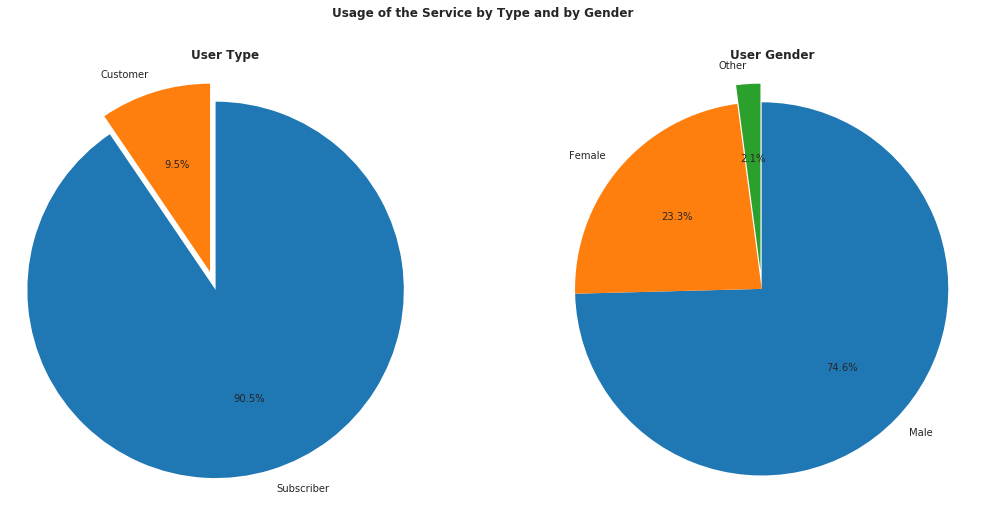

In [3]:
plt.figure(figsize = [18, 8])
color = sb.color_palette()[0]
sb.set_style('darkgrid');

plt.subplot(1, 2, 1)
count1 = df.user_type.value_counts()/df.shape[0]
plt.pie(count1, explode = [0, 0.1], labels = count1.index, startangle = 90, counterclock = False, autopct = '%1.1f%%', 
        shadow = False)
plt.axis('square')
plt.title('User Type', fontweight = 'semibold');

plt.subplot(1, 2, 2)
count2 = df.member_gender.value_counts()/df.shape[0]
plt.pie(count2, explode = [0, 0, 0.1], labels = count2.index, startangle = 90, counterclock = False, autopct = '%1.1f%%', 
        shadow = False)
plt.axis('square')
plt.title('User Gender', fontweight = 'semibold')

plt.suptitle('Usage of the Service by Type and by Gender', fontsize = 12, fontweight = 'semibold');


## Most Popular Days and Times for the Use of the Service

> The most popular day of use of the service is Thursday as most people begin and end their trips on this day. This is closely followed by Tuesday. The least popular days for use of the service are Sunday and Saturday. The most popular times of use of the service are 8:00 a.m and 5:00 p.m. 

In [4]:
ordinal_var_dict = {'start_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday'],
                    'end_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

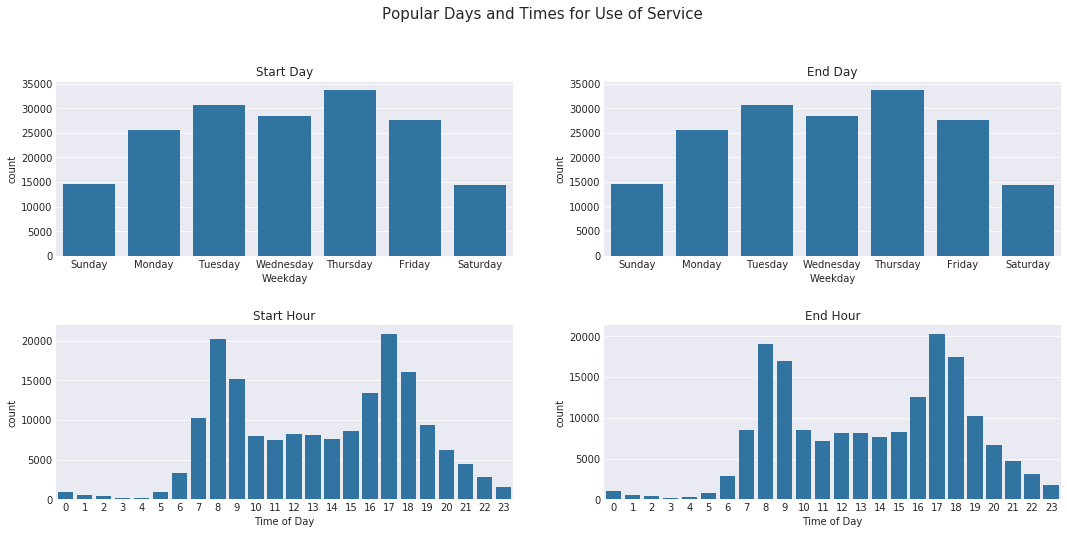

In [5]:
fig = plt.figure(figsize=(18, 8))

fig.subplots_adjust(hspace=0.4, top=0.85)

hour_order = np.arange(0,24)

fig.suptitle("Popular Days and Times for Use of Service", fontsize=15)

ax1 = fig.add_subplot(2,2,1)
sb.countplot(data = df, x = 'start_day', color = color);
ax2 = fig.add_subplot(2,2,2)
sb.countplot(data = df, x = 'end_day', color = color);
ax3 = fig.add_subplot(2,2,3)
sb.countplot(data = df, x = 'start_hr', color = color, order = hour_order)
ax4 = fig.add_subplot(2,2,4)
sb.countplot(data = df, x = 'end_hr', color = color, order = hour_order)

ax1.title.set_text("Start Day")
ax2.title.set_text("End Day")
ax3.title.set_text("Start Hour")
ax4.title.set_text("End Hour")

ax1.set_xlabel('Weekday')
ax2.set_xlabel('Weekday')
ax3.set_xlabel('Time of Day')
ax4.set_xlabel('Time of Day')

plt.show()

## Duration of Trips by Day
### On what days do users ride for longer times?

> Previously we saw that Sunday and Saturday are the least popular days of use for this service. 
> However, it is interesting to note that the longest bike rides are taken on Sunday and Saturday.

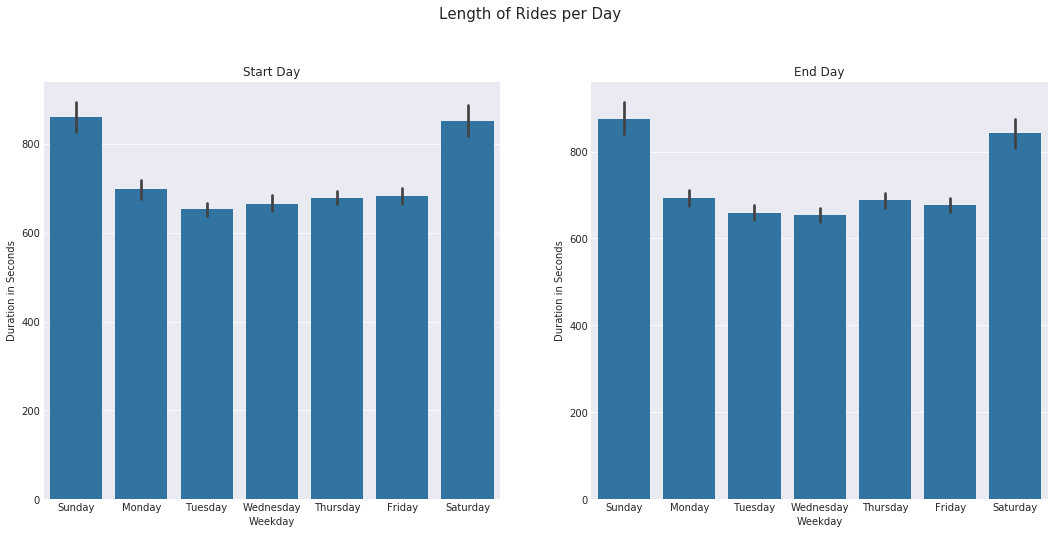

In [6]:
fig = plt.figure(figsize=(18, 8))

fig.subplots_adjust(hspace=0.4, top=0.85)

fig.suptitle("Length of Rides per Day", fontsize=15)

ax1 = fig.add_subplot(1,2,1)
# Start Day
sb.barplot(data = df, x = 'start_day', y = 'duration_sec', color = color)

ax2 = fig.add_subplot(1,2,2)
# End Day
sb.barplot(data = df, x = 'end_day', y = 'duration_sec', color = color)

ax1.title.set_text("Start Day")
ax2.title.set_text("End Day")

ax1.set_xlabel('Weekday')
ax1.set_ylabel('Duration in Seconds')
ax2.set_xlabel('Weekday')
ax2.set_ylabel('Duration in Seconds')

plt.show()

## Duration of Trips by Users
### Of the different Charactersitics of the Users, which Group rides Longest?

> We can see that Customers of Other gender use the service for the longest duration of time.

''

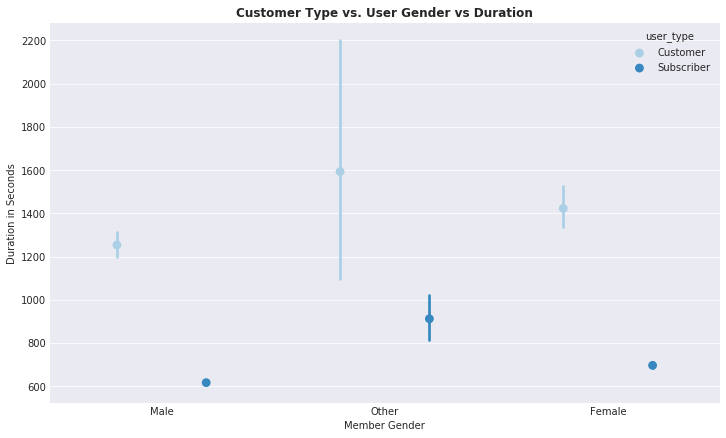

In [7]:
fig = plt.figure(figsize=(12, 7))
sb.pointplot(data = df, x ='member_gender', y = 'duration_sec', hue = 'user_type', palette = 'Blues', 
             linestyles = '', dodge = 0.4)
plt.title('Customer Type vs. User Gender vs Duration', fontsize = 12, fontweight = 'semibold')
plt.xlabel('Member Gender')
plt.ylabel('Duration in Seconds')
;

### Conclusion

> I found that among user types, subscribers used the service more than customers did. This should be typical and therefore were not surprising results. Among the three genders listed, Male users used the service a lot more than users of the two other genders.
> I also found that the most popular day of use of the service is Thursday as most people begin and end their trips on this day. This is closely followed by Tuesday. The least popular days for use of the service are Sunday and Saturday. The most popular times of use of the service are 8:00 a.m and 5:00 p.m. The peak use of service at these times is likely caused by people heading to the office in the morning and leaving for home in the evenings. 
> I found it interesting that although Sunday and Saturday are the least popular days of use for this service, the longest bike rides are taken on Sunday and Saturday.
> Another interesting insight was that customers of 'other' gender took longer bike rides than any other group, even though subscribers and males, as we have earlier seen, use the service way more.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [8]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to html
[NbConvertApp] Writing 452636 bytes to Part_II_slide_deck_template.html


In [ ]:
# Use this command if you are running this file in local


[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 428137 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/